In [1]:
import numpy  as np
import matplotlib.pyplot as plt
import os 
import csv
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [46]:
carpeta=r"C:\Users\YaelSuarez\OneDrive - Karolinska Institutet\Documents\KI\Experiments\XRD\Biomineralization powder\10_5 2.19"

In [47]:
#Function for having x and y axis from document
def read_xrd(filename):
    with open(filename, 'r') as f:
        l=next(f)
        while l != "#Attenuator_coefficient=1.000000\n":
            l=next(f)
        reader=csv.reader(f,delimiter=" ")
        x=[]
        y=[]
        for row in reader:
            i = len(y)
            x.append(float(row[0]))
            y.append(float(row[1])) 
            y[i] = float(y[i]) - 0
    return np.array(x), np.array(y)

 HAp 
 100 hrs 
 48 hrs 
 24 hrs 
 as prepared 


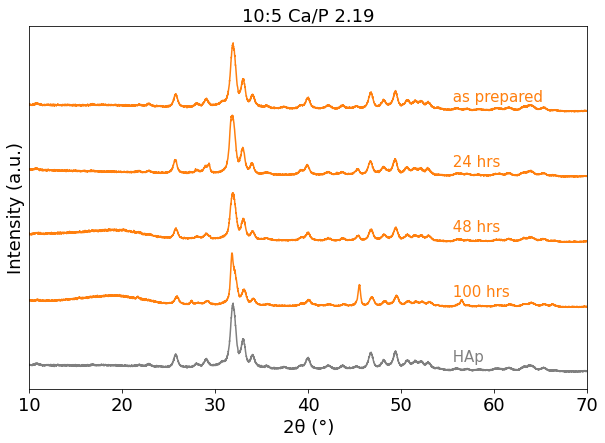

In [48]:
cm = 1/1.5
fig = plt.figure(figsize=(2*7.5*cm, 2*5*cm))

filenames = [os.path.join(carpeta,f) for f in os.listdir(carpeta) if f.endswith(".txt")]
all_x = []
all_y = []
all_labels = []
c_graph = "tab:orange"
colors = [ "tab:grey", c_graph, c_graph, c_graph, c_graph]
space = 0.9
for filename in filenames:
    x,y = read_xrd(filename)
    all_x.append(x.tolist())
    all_y.append(y.tolist())
    legend = filename.replace("_Theta_2-Theta.txt", " ")
    legend = legend.replace(carpeta, " ")
    legend = legend.replace(".txt", " ")
    legend = legend.replace("\\", " ")
    legend = legend.replace("powder", " ")
    legend = legend.replace("_", ":")
    #legend = legend.replace("p", ".")
    legend = legend.replace("to", "/")
    legend = legend.replace(legend[0:3], "")
    all_labels.append(legend)
    print(legend)

all_y = np.array(all_y)
all_y_max = space * np.max(all_y)
y_shifts = np.arange(0,len(all_y),1) * all_y_max
y_shifted = all_y + np.reshape(y_shifts,[len(all_y),1])

    #plt.plot(x,y, label = legend)
    #plt.legend(loc='upper right')
for x, y, l, s, c in zip(all_x, y_shifted, all_labels, y_shifts,colors):
    plt.plot(x, y, label=l, color=c)
    x_label = 55
    y_label = s + all_y_max * 0.22
    plt.annotate(l, xy=(x_label, y_label), fontsize=15, color=c)
plt.xlabel("2θ (°)", fontsize=18)
plt.ylabel("Intensity (a.u.)", fontsize=18)
plt.title("10:5 Ca/P 2.19", fontsize=18, loc='center')
plt.xlim(10,70)
plt.yticks([])
plt.xticks(fontsize=18)
plt.show()
    #To save figure
#fig.savefig(carpeta)